In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

loading data set

In [113]:
dataframe = pd.read_csv('weatherHistory.csv')
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [114]:
dataframe = dataframe.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis=1)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [115]:
new_columns = {'Temperature (C)':'x1', 'Apparent Temperature (C)':'y', 'Humidity':'x2', 'Wind Speed (km/h)':'x3',
          'Wind Bearing (degrees)':'x4', 'Visibility (km)':'x5', 'Pressure (millibars)':'x6'}

In [116]:
dataframe.rename(columns=new_columns, inplace=True)

In [117]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [118]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

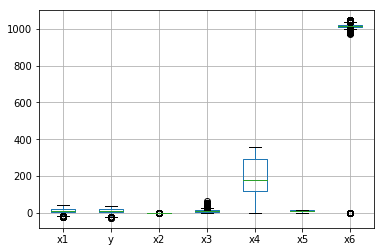

In [119]:
dataframe.boxplot()

In [120]:
 dataframe=dataframe.head(500)

In [121]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,500.0,13.687300,4.558239,3.722222,10.15000,13.022222,17.244444,25.044444
y,500.0,13.300889,5.129404,1.494444,10.15000,13.022222,17.244444,25.044444
x2,500.0,0.742740,0.167093,0.320000,0.62000,0.760000,0.890000,1.000000
x3,500.0,10.194134,6.764105,0.000000,4.78975,9.177000,14.063350,32.167800
x4,500.0,190.222000,103.717111,0.000000,132.75000,169.000000,289.000000,359.000000
x5,500.0,10.435118,3.708072,0.289800,9.98200,10.819200,11.447100,15.874600
x6,500.0,1013.524640,4.040835,1003.570000,1011.34500,1013.910000,1016.520000,1021.010000


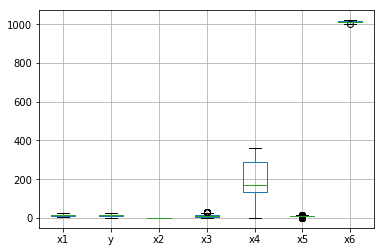

In [122]:
dataframe.boxplot()


In [123]:
# Separating the output and the parameters data frame
def separate(dataframe):
    output = dataframe.y
    return dataframe.drop('y', axis=1), output

In [124]:
# dataframe = dataframe[(dataframe >= dataframe.quantile(0.25)) & (dataframe<dataframe.quantile(0.75))]
# fucntion to get 
def remove_outlier(dataframe):
    dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
    return dataframe

In [125]:
def split(dataframe):
    test_data = dataframe.tail(30).reset_index(drop=True)
    return dataframe.head(len(dataframe)-30), test_data

In [126]:
# using min max
def feature_scaling_column(dataframe, column_scaling):
    mean_of_col = dataframe[column_scaling].mean()
    std_of_col = dataframe[column_scaling].std()
    print('for col= {} mean= {} and std={} '.format(column_scaling,mean_of_col,std_of_col))
    for counter in range(0, len(dataframe)):
        dataframe.loc[counter, column_scaling] =  ((dataframe.loc[counter, column_scaling] - mean_of_col) / std_of_col)
    print("successfully scaled column ",column_scaling)
    return dataframe

In [127]:
Ypred = pd.Series(np.zeros(len(dataframe)))


In [128]:
dataframe = remove_outlier(dataframe)

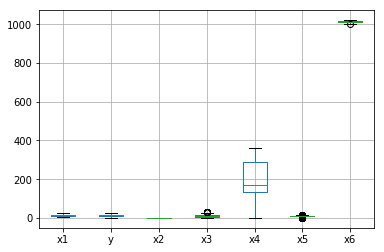

In [129]:
dataframe.boxplot()

In [130]:
dataframe.isna().sum()

x1    0
y     0
x2    0
x3    2
x4    0
x5    0
x6    0
dtype: int64

In [131]:
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

In [132]:
 dataframe=dataframe.head(500)

In [141]:
class Multi_Linear_Regression():
    
    
    def __init__(self):
        self.learning_rate = 0.01
        self.iteration = 10000
        self.ncols=6
        self.fig = plt.figure()
        self.fig, (self.ax1, self.ax2, self.ax3,self.ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 10))
        
    def train(self, dataframe, output):
        weights = np.full(self.ncols,1.0)
        dframe_size = len(dataframe)
        bais = 1.0

        # Ypred = (dataframe.x1*weight1 + dataframe.x2*weight2 + dataframe.x3*weight3+ dataframe.x4*weight4 + dataframe.x5*weight5 + bais)
        
     
        for iterations in range(0, self.iteration):
            Ypred = self.classify(dataframe, weights,bais)
            diff = Ypred-output
            # cost = sum(y^ -y)**2)/2m
            cost = np.sum((diff)**2)/(2*dframe_size)
#             if(iterations%100==0):
#                 print('In training iteration: {}, cost {}, bais:{}, weights:{}'
#                       .format(iterations, cost,bais,weights))
#             if(Ypred.isna().sum()>=1 or output.isna().sum()>=1 or bais == (-np.inf)):
#                 print('In training iteration: {}, Ypred.isna().sum(): {}, output.isna().sum(): {}, bais:{}, weights:{}'.format(iterations,Ypred.isna().sum(),output.isna().sum(),bais,weights))
#                 print(Ypred)
#                 return weights, bais
            
#             if(iterations%10==0):
#                 self.ax2.plot(iterations,cost, markersize=0.3, marker='x', color='r')
#                 self.ax2.set_title('iteration vs cost')
#                 self.ax3.plot(bais,cost, markersize=0.3, marker = '+', color='#42f48c')
#                 self.ax3.set_title('bais vs cost')
# #             print('iteration {} diff{} '.format(iterations,np.sum(diff)))
            for counter1 in range(0, self.ncols):
                weights[counter1] -= self.learning_rate*(np.sum(np.multiply(
                                                    diff,dataframe.iloc[:,counter1])))/dframe_size
            bais -= self.learning_rate*(np.sum(diff)/dframe_size)
            
        return weights, bais
        
        
    def classify(self, dataframe, weights, bais):
        Ypred = pd.Series(np.zeros(len(dataframe)))
        dframe_size = len(dataframe)
        for counter1 in range(0, dframe_size):
            for counter2 in range(0, self.ncols):
                Ypred[counter1] += weights[counter2]*dataframe.iloc[counter1, counter2]
#                 print(Ypred[counter1], weights[counter2], dataframe.iloc[counter1, counter2])
        Ypred = np.add(bais,Ypred)
        return Ypred
        
    def accuracy(self,Ypred, y_output):
        for counter in range(0, len(Ypred)):
            Ypred[counter]= abs(Ypred[counter]-y_output[counter])/y_output[counter]
#         Ypred = np.divide(abs(Ypred-y_output),y_output)
        self.ax4.scatter(Ypred,y_output, marker='+',color='g')
        plt.subplots_adjust(hspace=0.5, wspace = 0.5)
        plt.show()
        self.ax4.set_title("predicted values vs original output")
        error = abs(np.sum(Ypred))/len(Ypred)
        return (1-error)*100
                

In [142]:
def main(dataframe, test_data):
    dataframe, output = separate(dataframe)
    regression_object = Multi_Linear_Regression()
    # feature Scaling:
    weights, bais = regression_object.train(dataframe,output)
#     print(weights,bais)
    test_data, output = separate(test_data)
    Ypred = regression_object.classify(test_data, weights, bais)
    print("Accuracy = ", regression_object.accuracy(Ypred,output)) 

In [143]:
# plt.plot(np.random.rand(20))

In [144]:
# np.add(4,dataframe)

In [145]:
dataframe, test_data = split(dataframe)

In [146]:
for item in dataframe:
    dataframe = feature_scaling_column(dataframe, item)

for col= x1 mean= -0.07338842793899425 and std=0.9650377649404539 
successfully scaled column  x1
for col= y mean= -0.07059287454092546 and std=0.9739934700379443 
successfully scaled column  y
for col= x2 mean= 0.03838400038844643 and std=0.9897718572948253 
successfully scaled column  x2
for col= x3 mean= 0.02343080433681932 and std=1.0215157280919012 
successfully scaled column  x3
for col= x4 mean= 0.060121514216342806 and std=0.9978231806274382 
successfully scaled column  x4
for col= x5 mean= -0.016928938643685783 and std=1.0218676775054538 
successfully scaled column  x5
for col= x6 mean= -0.008429795134012378 and std=1.0280558658047738 
successfully scaled column  x6


In [147]:
# from IPython.core.debugger import Tracer; Tracer()()
# dataframe.isnan().sum()


In [ ]:
main(dataframe,test_data)

##### yd = pd.Series(dataframe.x1)